In [21]:
import jax.numpy as jnp
import numpy as np
from skimage.transform import downscale_local_mean
import matplotlib.pyplot as plt

In [22]:
arr = jnp.array([[0, 0, 1, 1], [0, 0, 1, 1], [2, 2, 3, 3], [2, 2, 3, 3], [4, 4, 5, 5], [4, 4, 5, 5.]])

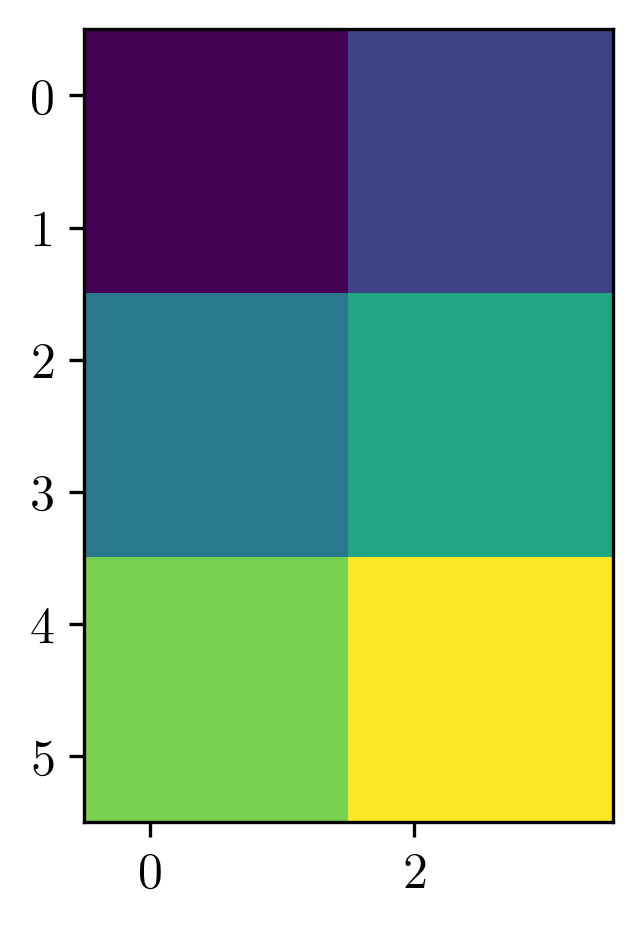

In [23]:
plt.imshow(arr)

In [32]:
Array = jnp.ndarray


def downsample(arr: Array, factor: int) -> Array:
    """
    Downsamples an array by averaging over blocks. Batched.
    
    Notes:
        See https://stackoverflow.com/a/60345995.
    
    Args:
        arr: the array to downsample
        factor: the factor by which to downsample. The sizes of the last
            two dimensions of ``arr`` must be divisible by ``factor``.
    
    Returns:
        The downsampled array.
    """
    nr, nc = arr.shape
    assert nr % factor == 0
    assert nc % factor == 0
    return (
        arr.reshape(
            *arr.shape[:-2],
            arr.shape[-2] // factor,
            factor,
            arr.shape[-1] // factor,
            factor
        )
        .mean(-3)
        .mean(-1)
    )

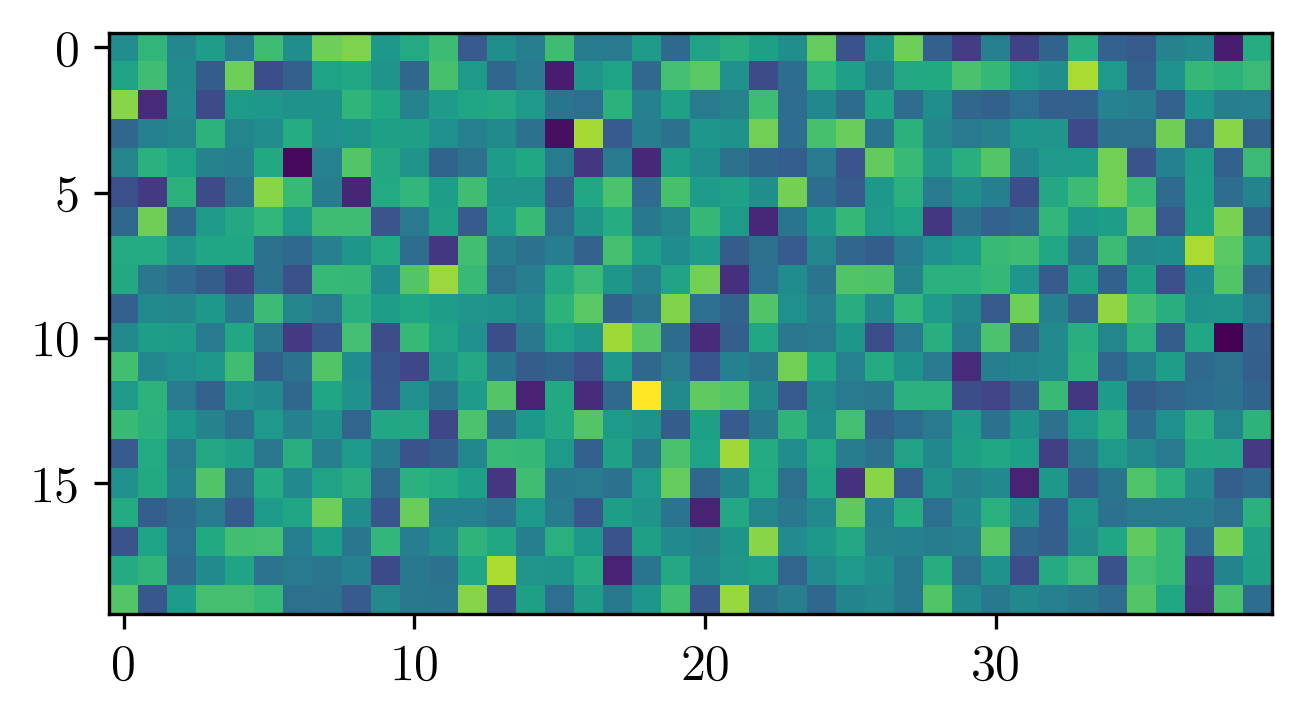

In [48]:
plt.imshow(downscale_local_mean(arr, (5, 5)))

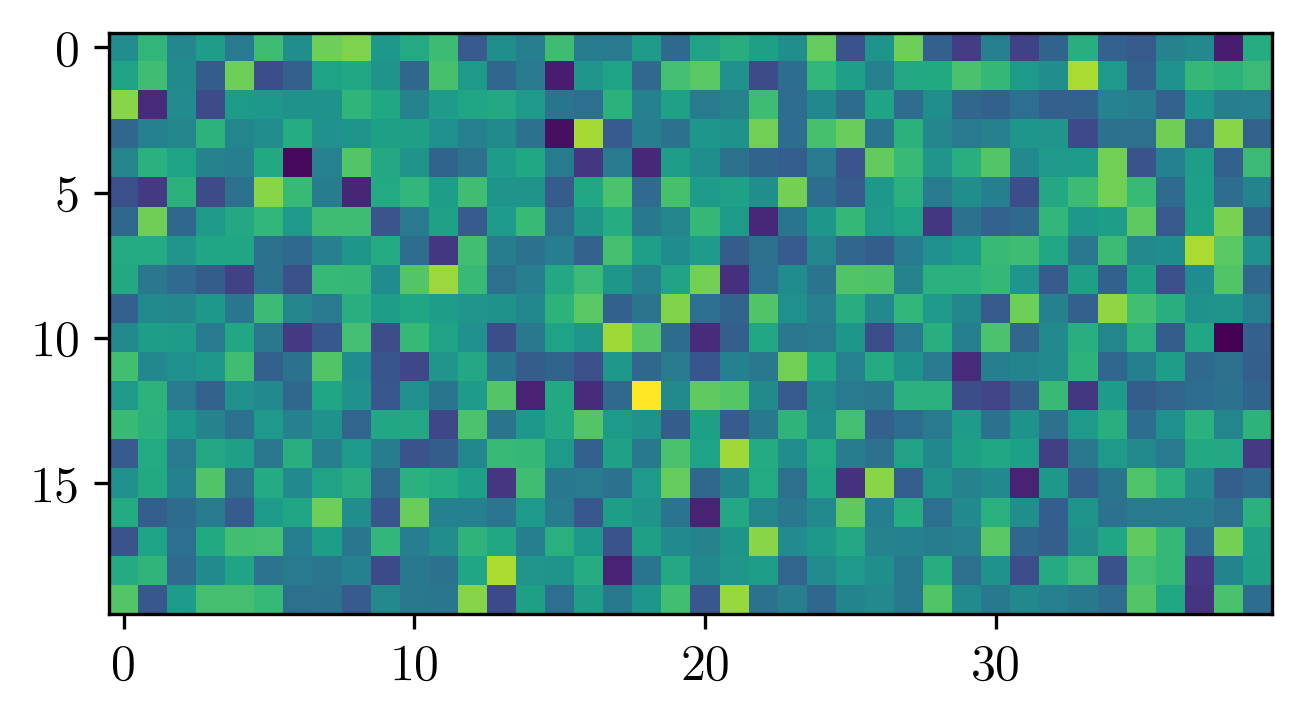

In [49]:
plt.imshow(downsample(arr, 5))

In [50]:
arr = np.random.rand(100, 200)
jnp.allclose(downsample(arr, 5), downscale_local_mean(arr, (5, 5)))

DeviceArray(True, dtype=bool)